<a href="https://www.kaggle.com/code/tanbeerjubaer/second-one?scriptVersionId=130099761" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/3 Idiots 2009.csv
/kaggle/input/dataset/8 Mile 2002.csv


# Predicting the rating of a movie using machine learning algorithm.

In this notebook, we're going to go through an example machine learning project with the goal of predicting the rating of a movie.

## 1.Problem definition

 Movie rating prediction based on review using machine learning & deep learning model

## 2.Data

This data set is downloaded from IMDb movie reviews dataset.

Link: https://ieee-dataport.org/open-access/imdb-movie-reviews-dataset

### Primary Target:
Predict rating of one movie’s rating based on the review

### Further Target:
Predict rating of different movies.



## 3.Steps
Step1: download the data and there will be a lot of movie’s csv file where we need to extract review and rating.

Step2: after extracting feature we need to apply world embedding process to create train and test data.
Word embedding process:

* 1.https://www.turing.com/kb/guide-on-word-embeddings-in-nlp
* 2.https://www.geeksforgeeks.org/word-embeddings-in-nlp/
* 3.https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa
* 4.https://machinelearningmastery.com/what-are-word-embeddings/

## 4.Modeling

Design models using machine learning algorithms:

    1. Use ML algorithms like SVM
    2. Use RNN model like LSTM

## 5. Evaluating

## 6. Improving

Imporving machine learning model using:

* `Grid Search CV`

 

In [24]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline


## Load data 

In [25]:
df = pd.read_csv('/kaggle/input/dataset/3 Idiots 2009.csv')

In [26]:
df.head(2)

,username,rating,helpful,total,date,title,review
0,MartinHafer,10,264,313,2 June 2011,Wonderfully entertaining.\n,"It's hard for me to review this film, as I hav..."
1,reedcom,9,350,423,20 November 2011,Wow this American loves this movie\n,I asked my co-workers to recommend a Bollywood...


In [27]:
# Drop every column except the specified column
df = df[['rating', 'review']]

In [28]:
df.head(3)

,rating,review
0,10,"It's hard for me to review this film, as I hav..."
1,9,I asked my co-workers to recommend a Bollywood...
2,10,"As many ordinary Chinese high school students,..."


### 1. Delete the null rows

In [29]:
df = df[~(df == 'Null').any(axis=1)]

In [30]:
df.shape

(566, 2)

<AxesSubplot: title={'center': 'Rating Count'}>

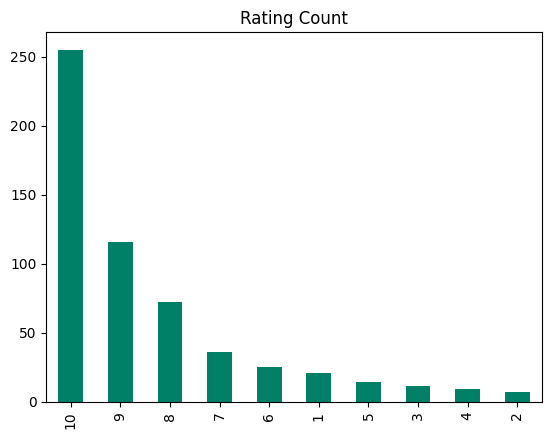

In [11]:
df.rating.value_counts().plot(kind='bar', cmap='summer', title='Rating Count')

## Delete the outliers 

In [31]:
df = df[~(df == '1').any(axis=1)]
df = df[~(df == '2').any(axis=1)]
df = df[~(df == '3').any(axis=1)]

In [32]:
df.rating.value_counts()

10    255
9     116
8      72
7      36
6      25
5      14
4       9
Name: rating, dtype: int64

<AxesSubplot: title={'center': 'Rating Count'}>

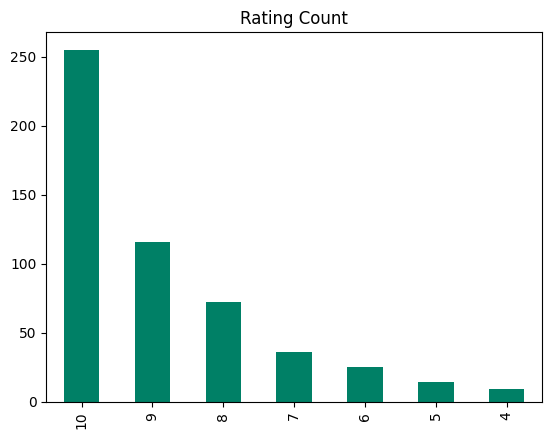

In [33]:
df.rating.value_counts().plot(kind='bar', cmap='summer', title='Rating Count')

In [34]:
df.review

0      It's hard for me to review this film, as I hav...
1      I asked my co-workers to recommend a Bollywood...
2      As many ordinary Chinese high school students,...
3      Awesome film man. Saw this with my family in a...
4      "Whatever the problem in life is... just say t...
                             ...                        
595    Well, there are many reasons to watch this mov...
596    In a late scene from the film, 2 of the 3 idio...
597    "3 IDIOTS" is in my books on of the best Bolly...
598    I waited for 3 idiots more than any movie in m...
599    A fun filled movie that takes you back to your...
Name: review, Length: 527, dtype: object

## 1. Data Preparation: 
Prepare your dataset, which should include review texts and corresponding ratings. Ensure the data is properly cleaned and preprocessed, including steps such as removing punctuation, lowercasing, tokenization, and removing stop words.

## Cleaning up the text 

using python `replace()` function to replce the unnecessary things.

A function to clean a paragraph.



In [35]:
def clean_text(test):
    '''
    Clean's up the unnecessary thiings of a text by replacing them with proper symbols.
    '''
    test = test.replace('<br/>', '')
    test = test.replace('--', ' ')
    test = test.replace("'", '')
    test = test.replace('"','')
    test = test.replace('.', '')
    test = test.replace(',', '')
    test = test.lower()
    return test

In [36]:
# Convert the text column to vectors
df['review'] = df['review'].apply(clean_text)

In [37]:
df.review[1]

'i asked my co-workers to recommend a bollywood movie i expected dumb and dumber by the title it wasnt that at all it is more of an inspirational comedy with some serious but good messages a more accurate title would have been the legend of ranchoodd to me is that they speak in part english part hindi through the movie kinda like some speak spanglish here i suppose i know none of the actors but the acting was good and there was plenty of humor the characters were believable most movie dancing i find a little silly but i even liked the dancing routines in the bathroomi will be asking my co-workers for more recommendations after this one!'

In [38]:
df.head(2)

,rating,review
0,10,its hard for me to review this film as i have ...
1,9,i asked my co-workers to recommend a bollywood...


## Feature Extraction: 
Convert the textual data into numerical representations that can be understood by machine learning algorithms. Common techniques include Bag-of-Words (BoW), TF-IDF (Term Frequency-Inverse Document Frequency), or word embeddings like Word2Vec or GloVe. These techniques help convert the review text into feature vectors.

In [39]:
import spacy

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_lg")


# Function to convert text to vectors using spaCy
def text_to_vectors(text):
    doc = nlp(text)
    return doc.vector

# Apply the text_to_vectors function to the 'text' column
# X = X.apply(text_to_vectors)



In [41]:
# test = test.apply(text_to_vectors)

In [ ]:
test[0]

In [42]:
df['vector'] = df['review'].apply(text_to_vectors)

In [43]:
df.head(2)

,rating,review,vector
0,10,its hard for me to review this film as i have ...,"[-1.4246677, 1.5345206, -2.8859496, -1.1309304..."
1,9,i asked my co-workers to recommend a bollywood...,"[-1.6817063, 0.8826106, -2.1128485, -0.9402013..."


In [44]:
df.vector[0]

array([-1.4246677e+00,  1.5345206e+00, -2.8859496e+00, -1.1309304e+00,
        2.7211733e+00,  3.3373320e-01,  1.2318450e+00,  4.5232210e+00,
       -1.0843763e+00, -5.7037264e-01,  7.3527293e+00,  1.7573050e+00,
       -3.8595288e+00,  1.0467644e+00,  1.7467601e+00,  2.3031469e-01,
        2.0082176e+00, -8.3086199e-01, -1.2919552e+00, -1.7724466e+00,
        1.2651144e+00,  1.9339916e-01, -1.7225491e+00, -1.4706962e+00,
       -3.6893213e-01, -2.4095588e+00, -2.9996521e+00, -8.0429870e-01,
       -1.7348373e+00,  1.5941193e+00,  1.3144785e+00, -5.0088638e-01,
       -7.9196930e-01, -1.6689528e+00, -1.4786016e+00,  3.2826021e-02,
       -9.5509356e-01,  1.9834471e+00,  3.0563555e+00,  6.6329384e-01,
       -3.0990297e-01,  9.8009700e-01,  3.6926800e-01, -8.3174777e-01,
       -8.3313257e-01,  2.0187192e+00,  7.3740906e-01, -3.2451293e+00,
       -1.1094384e+00,  2.5129695e+00, -3.9851868e-01,  1.2806140e+00,
        6.8198460e-01, -5.1693645e+00, -2.1002386e+00, -6.0442859e-01,
      

## Looks like everything is fine

In [45]:
# Set data 
X = list(df['vector'])
y = list(df.rating.astype(int))

## Splitting the Dataset: 
Divide your dataset into training and testing subsets. The training set is used to train the model, while the testing set is used to evaluate its performance.


In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

In [47]:
# Split the data into training and testing sets

np.random.seed(71)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
len(X_train), len(X_test), len(y_train), len(y_test)

(421, 106, 421, 106)

## Model Selection: 
Choose an appropriate machine learning algorithm for text classification. Some commonly used models include Naive Bayes, Support Vector Machines (SVM), Logistic Regression, or more advanced models like Recurrent Neural Networks (RNNs) or Transformers.

### 1. RandomForestClassifier

In [49]:
# Load model
model = RandomForestClassifier()

## Model Training: 
Train the selected model using the training dataset. The model learns the relationships between the textual features and the corresponding ratings.

In [50]:
model.fit(X_train, y_train);

In [51]:
model.score(X_test, y_test)

0.49056603773584906

## Evaluation


In [53]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}", )

Accuracy: 49.06


### 2. Support vector machine

In [60]:
# Import SVC
from sklearn.svm import SVC

# Create and train the SVM classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_preds = svm_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_preds)

print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 50.00


In [63]:
svm_model.score(X_test, y_test)

0.5

### 3. Logistic Regression

In [61]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression


# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
preds = logreg.predict(X_test)

#Calculate accuracy score
accuracy = accuracy_score(y_test, preds)

print(f"Accuracy: {accuracy*100:.2f}", )

Accuracy: 32.08


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
logreg.score(X_test, y_test)

0.32075471698113206

# Recurrent Neural Network (RNN)

In [66]:
df.head(2)
df1 = df[['rating', 'review']]
df1.head(2)

,rating,review
0,10,its hard for me to review this film as i have ...
1,9,i asked my co-workers to recommend a bollywood...


In [81]:
# Import tensorflow
import tensorflow as tf

# Load the spaCy model
nlp = spacy.load("en_core_web_lg")

# Tokenize and vectorize the paragraphs
def process_paragraph(paragraph):
    '''
    Converts a paragraph of text into Vectors.
    '''
    tokens = nlp(paragraph)
    vectors = [token.vector for token in tokens]
    return vectors

df1['vectors'] = df1['review'].apply(process_paragraph)



In [82]:
df1.head(2)

,rating,review,vectors
0,10,its hard for me to review this film as i have ...,"[[-2.1506, 4.845, 1.3031, 2.005, 17.474, -0.86..."
1,9,i asked my co-workers to recommend a bollywood...,"[[2.1387, -2.8931, -2.998, -9.5886, -14.661, -..."


In [124]:
model_score = {
    'name': ['RFC', 'SVM', 'LogisticRegression'],
    'score': [.49, .5, .32]
}
# Convert the dictionary to a DataFrame
scores = pd.DataFrame(model_score)

# Print the DataFrame
scores

,name,score
0,RFC,0.49
1,SVM,0.50
2,LogisticRegression,0.32


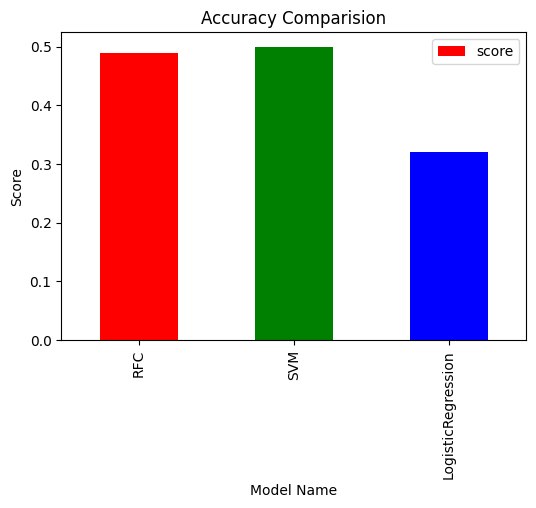

In [134]:
# Create a figure with a custom figsize

# Plot the DataFrame
scores.plot(x='name', y='score', kind='bar', color=['red', 'green', 'blue'], figsize=(6, 4))
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.title('Accuracy Comparision')

# Display the plot
plt.show();